<a href="https://colab.research.google.com/github/averma12/DL-from-scratch/blob/master/Kaiming_Xavier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip,math,torch,matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = "http://deeplearning.net/data/mnist/mnist.pkl"

In [0]:
import math

In [2]:
path = datasets.download_data(MNIST_URL, ext='.gz')
path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [4]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
img = x_train[0]

In [7]:
type(img)

torch.Tensor

In [8]:
img.shape

torch.Size([784])

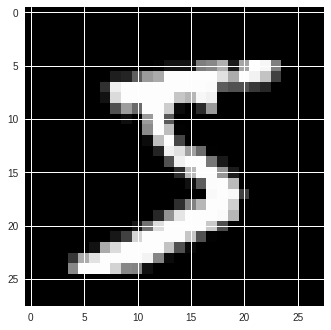

In [9]:
plt.imshow(img.view(28,28))

In [0]:
from torch.nn import init,Conv2d

In [0]:
??torch.nn.Conv2d

In [0]:
torch.nn.modules.conv._ConvNd.reset_parameters??

In [0]:
nh = 32
ll = Conv2d(1,nh,5) # 1 is the no of input channels,nh is the no of channels of the kernel and 5X5 is the size of the kernel

In [0]:
#Normalize the images
def normalize(x, m, s): return (x-m)/s

In [0]:
#x_train,y_train,x_valid,y_valid = get_data()
train_mean,train_std = x_train.mean(),x_train.std()
x_train = normalize(x_train, train_mean, train_std)
x_valid = normalize(x_valid, train_mean, train_std)

In [23]:
x_train = x_train.view(-1,1,28,28)
x_valid = x_valid.view(-1,1,28,28)
x_train.shape,x_valid.shape

(torch.Size([50000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [27]:
n,*_ = x_train.shape # * is added to basically say all values after the first one are to be packed in this operator
c = y_train.max() + 1
n,c

(50000, tensor(10))

In [0]:
l1 = Conv2d(1, nh, 5)

In [0]:
x = x_valid[:100]

In [31]:
x.shape

torch.Size([100, 1, 28, 28])

In [0]:
def stats(x): return x.mean(),x.std()

In [33]:
stats(l1.weight) #This doesn't seem right. The normalization is not correct

(tensor(-0.0003, grad_fn=<MeanBackward1>),
 tensor(0.1194, grad_fn=<StdBackward0>))

In [34]:
stats(l1.bias) # The pattern repeats with the bias

(tensor(0.0133, grad_fn=<MeanBackward1>),
 tensor(0.1114, grad_fn=<StdBackward0>))

In [0]:
t = l1(x)

In [38]:
t.shape #100 for the total no of images,32 for the no of channels of the kernel
#24,24 after the convolution operation (input_channels - kernel_channels + padding which is zero here/Strides) + 1 = 24

torch.Size([100, 32, 24, 24])

In [39]:
#let's normalize t here
stats(t) #mean is acceptable but std is definitely not

(tensor(0.0134, grad_fn=<MeanBackward1>),
 tensor(0.5870, grad_fn=<StdBackward0>))

In [41]:
ll.weight.shape

torch.Size([32, 1, 5, 5])

In [42]:
#Let's initialize with init.kaiming_normal according to the paper Diving deep into Rectifiers
init.kaiming_normal_(l1.weight, a=1.)
stats(l1(x)) #Let's normalize the equations again output shows kaiming_normal kinda works

(tensor(0.0463, grad_fn=<MeanBackward1>),
 tensor(1.0816, grad_fn=<StdBackward0>))

In [0]:
import torch.nn.functional as F

In [0]:
def f1(x,a=0):
    return F.leaky_relu(ll(x),a)

In [47]:
init.kaiming_normal_(ll.weight, a=0)

Parameter containing:
tensor([[[[ 1.5368e-01,  4.2842e-01, -8.2841e-02, -1.5413e-01, -8.4771e-02],
          [-8.8782e-02, -1.7576e-01,  1.4056e-01, -3.7928e-01, -1.4373e-01],
          [-5.4774e-02,  5.8700e-02, -2.3832e-02,  7.8265e-02,  3.8910e-01],
          [ 2.1859e-01,  2.2084e-01, -4.7381e-01, -2.9494e-01,  3.5240e-01],
          [ 9.7632e-02,  1.3063e-01, -7.0782e-01,  1.9888e-01, -2.1150e-01]]],


        [[[ 4.4105e-01,  7.2861e-01,  1.1292e-01, -2.9689e-01, -2.6870e-01],
          [-1.2448e-01,  2.6373e-01, -4.3393e-02, -7.3309e-02,  9.1287e-02],
          [-1.8269e-01,  4.4844e-02,  8.8600e-02, -1.1403e-02, -4.2381e-02],
          [-2.1392e-01,  4.7261e-01, -2.0508e-01, -4.2198e-01,  1.8159e-01],
          [-3.2072e-01,  3.4755e-01,  2.5715e-01, -4.1033e-01, -2.7193e-01]]],


        [[[-3.4705e-01,  3.2895e-01, -3.9321e-02,  1.7952e-01, -2.1252e-01],
          [-6.6187e-02,  2.1632e-01,  3.9618e-01, -3.2289e-01, -2.1762e-01],
          [-1.3508e-01,  7.3294e-02, -5.3991e-

In [48]:
stats(f1(x))

(tensor(0.4616, grad_fn=<MeanBackward1>),
 tensor(0.9050, grad_fn=<StdBackward0>))

In [56]:
rec_fs = ll.weight[0,0].numel() #receptive field size. Total no of elements in one layer of the kernel
rec_fs

25

In [57]:
ll.weight.shape

torch.Size([32, 1, 5, 5])

In [59]:
ll.weight[0].shape

torch.Size([1, 5, 5])

In [73]:
x[0,0].shape

torch.Size([28, 28])

In [50]:
nf,ni,*_ = l1.weight.shape
nf,ni

(32, 1)

In [51]:
#fan_in is no of input filters,fan_out is no of output filters
fan_in = ni * rec_fs
fan_out = nf * rec_fs
fan_in,fan_out

(25, 800)

In [0]:
#full formula for Kaiming init
def gain(a):
    return math.sqrt(2/(1+a**2))

In [54]:
gain(1),gain(0),gain(0.01),gain(0.1),gain(math.sqrt(5.))

(1.0,
 1.4142135623730951,
 1.4141428569978354,
 1.4071950894605838,
 0.5773502691896257)

In [0]:
#kaiming uniform from scratch
def kaiming_uniform(x,a,use_fan_out=False):
    nf,ni,*_ = x.shape
    rec_fs = x[0,0].shape.numel()
    fan = nf*rec_fs if use_fan_out else ni*rec_fs
    print(fan)
    std = gain(a) / math.sqrt(fan)
    bound = math.sqrt(3.) * std
    x.data.uniform_(-bound,bound)
    
    

In [77]:
kaiming_uniform(l1.weight, a=0);
stats(f1(x))

25


(tensor(0.4616, grad_fn=<MeanBackward1>),
 tensor(0.9050, grad_fn=<StdBackward0>))

In [78]:
kaiming_uniform(l1.weight, a=math.sqrt(5.))
stats(f1(x))

25


(tensor(0.4616, grad_fn=<MeanBackward1>),
 tensor(0.9050, grad_fn=<StdBackward0>))

In [79]:
gain(math.sqrt(5.))/math.sqrt(25)

0.11547005383792515

**I reinitalized Layer_1 conv because I've been initializing weights a lot so don't want the output to get mucked up**

In [0]:
layer_1 = Conv2d(1, 32, 5)

In [82]:
kaiming_uniform(layer_1.weight, a=math.sqrt(5.))

25


In [0]:
def f1(x,a=0):
    return F.leaky_relu(layer_1(x),a)

In [85]:
stats(f1(x))

(tensor(0.2223, grad_fn=<MeanBackward1>),
 tensor(0.3848, grad_fn=<StdBackward0>))

** The above codebook was meant to highlight why it's necessary to have a good weight initialization. A good initialization is better than the regularization techniques and helps in faster convergence and help in vanishing and exploding gradients**

In [0]:
import torch

In [0]:
x = torch.randn(512)
a = torch.randn(512,512)

In [0]:
for i in range(100): x = a @ x

In [89]:
x.mean(),x.std() #activation explosion

(tensor(nan), tensor(nan))

In [0]:
x = torch.randn(512)
a = torch.randn(512,512)

In [0]:
for i in range(100): 
    x = a @ x
    if x.std() != x.std(): break

In [92]:
i

27

**MAgic numbers for scaling**

In [0]:
import math
import torch

In [0]:
x = torch.randn(512)
a = torch.randn(512,512) / math.sqrt(512)

In [0]:
for i in range(100): x = a @ x

In [8]:
x.mean(),x.std()

(tensor(-0.0823), tensor(1.9962))

In [9]:
1/ math.sqrt(512)

0.044194173824159216

In [10]:
x = torch.randn(512)
x.mean(), x.std()

(tensor(0.0339), tensor(1.0404))

In [11]:
mean,sqr = 0.,0.
for i in range(100):
    x = torch.randn(512)
    a = torch.randn(512, 512)
    y = a @ x
    mean += y.mean().item()
    sqr  += y.pow(2).mean().item()
mean/100,sqr/100

(-0.08444532558321953, 515.4477819824219)

In [12]:
mean,sqr = 0.,0.
for i in range(10000):
    x = torch.randn(1)
    a = torch.randn(1)
    y = a*x
    mean += y.item()
    sqr  += y.pow(2).item()
mean/10000,sqr/10000

(0.0014217505105136752, 0.9758755518180838)